In [4]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from utils import compute_fluctuations, ensemble_predictions
from experiments import train_network, plot_fluctuations_vs_width, plot_test_error_vs_width

In [2]:
# Data preparation
transform = transforms.ToTensor()
train_dataset = datasets.MNIST('./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST('./data', train=False, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [3]:
# Experiment parameters
widths = [10, 50, 100, 200]  # Network widths
ensemble_size = 15  # Number of networks in the ensemble
results = []

In [4]:
for width in widths:
    # Train multiple networks
    models = [train_network(width, seed=i, train_loader=train_loader, test_loader=test_loader) for i in range(ensemble_size)]
    
    # Compute fluctuations
    fluctuations = compute_fluctuations(models, test_loader)
    
    # Compute ensemble performance
    ensemble_preds = ensemble_predictions(models, test_loader)
    test_error = (ensemble_preds.argmax(dim=1) != torch.cat([y for _, y in test_loader])).float().mean().item()
    
    # Save results
    results.append({'width': width, 'fluctuations': fluctuations, 'test_error': test_error})
    print(f"Width: {width}, Fluctuations: {fluctuations}, Test Error: {test_error}")

# Plot results (optional)

Width: 10, Fluctuations: 2.4072420597076416, Test Error: 0.0617000013589859
Width: 50, Fluctuations: 1.627616286277771, Test Error: 0.02459999918937683
Width: 100, Fluctuations: 1.6080968379974365, Test Error: 0.017799999564886093
Width: 200, Fluctuations: 1.7167384624481201, Test Error: 0.015399999916553497


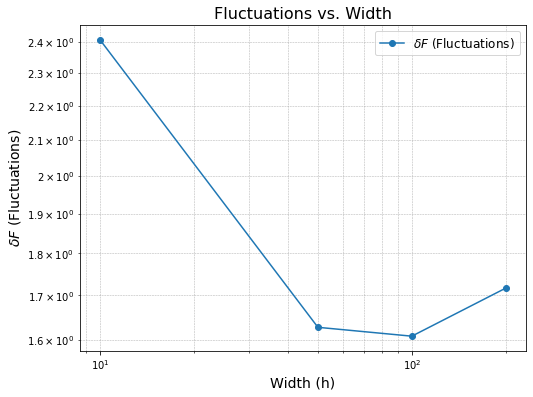

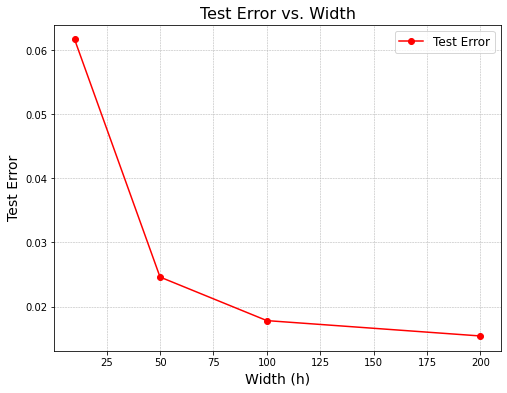

In [5]:
plot_fluctuations_vs_width(results)
plot_test_error_vs_width(results)